#1. 환경 설정 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH =  '/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data'

train_df = pd.read_csv(os.path.join(PATH, 'train.csv'), encoding='utf-8')
test_df = pd.read_csv(os.path.join(PATH, 'test.csv'), encoding='utf-8')

train_df

,title,comment,bias,hate
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none
...,...,...,...,...
8362,"""배우 이필립, SNS 스타 연인에게 초호화 프러포즈 눈길""",아니 근데.튜닝한사람은 프러포즈받지도.결혼도못함?ㅋㅋㅋ지들은 돈없어서 못하는것들이ㅋ...,others,hate
8363,"""[SC이슈]""""마약·백스텝·김새롬 탓"""" '실형 피한' 이찬오, 이미지는 치명상(...",그러니깐 여자를 잘만나야되~징글징글한것들 만나면 인생 끝가지 돌아가게 되는듯.. 근...,gender,hate
8364,"""[POP이슈]""""그들만의 세상""""…홍상수♥김민희, 새해데이트에 '반응싸늘'""",참으로 아름다운 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...,none,none
8365,[종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등,재미가 없어요,none,none


In [4]:
train_df["title"].unique()

array(['"\'미스터 션샤인\' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?"',
       '"[SC현장]""극사실주의 현실♥""…\'가장 보통의 연애\' 김래원X공효진, 16년만의 랑데부(종합)"',
       '"손연재, 리듬체조 학원 선생님 ""하고 싶은 일 해서 행복하다"""', ...,
       '"[종합] 사과로 시작한 \'전지적 참견 시점\', 8주만에 되찾은 웃음"',
       '"[엑\'s 인터뷰①] \'미스터 션샤인\' 김병철 ""먹먹한 결말, 울면서 봐…훌륭한 작품"""',
       '"신보라, 6월의 신부 된다…동갑내기와 교회서 비공개 결혼식[전문]"'], dtype=object)

In [5]:
train_df[train_df["title"] ==  '"\'미스터 션샤인\' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?"']

,title,comment,bias,hate
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
4889,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",노잼!!!!!!!!!!이병헌 넘 늙어다는거.......,others,hate
5605,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",소재 자체가 넘 유치해서 안 봄,none,none
6716,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태링 위사진표정귀엽다..,none,none
6804,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",재밌어 재밌어!!!,none,none
8274,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",참 재미없..... 역사왜곡하고도 겨우 이 정도...김은숙 좋아했는데 이번은 망작 인정,none,hate


In [6]:
train_df["title"].value_counts()

"'같이 살래요' 유동근, 장미희에 ""해아 물산 며느리, 내 딸이다"""             13
"최종훈, 집단 성폭행 의혹…""동석했지만 성관계 NO"" [종합]"                12
"[종합]'뉴스룸' 김남주 ""타고난 연기자 아냐…악녀스런 고혜란 표현 고민"""         12
"'아스달 연대기' 장동건-김옥빈, 들끓는 '욕망커플'→눈물범벅 '칼끝 대립'"          12
이던♥→계약해지→43kg 체중..현아의 모든 것이 '핫이슈' (종합)[Oh!쎈 이슈]       12
                                                      ..
"강하늘X온유X고은성, '임시정부수립 100주년 기념식'서 '신흥무관학교' 무대(종합)"      1
"[단독] 오연서 최측근 ""오늘도 의연하게 드라마 촬영...구혜선 글 참담""(인터뷰)"     1
"김용호, 서장훈 사생활 폭로 예고…서장훈 측 ""사실 확인 중"""                 1
"[엑's 프리즘] 이미도, '아이해' 임산부→실제 엄마…건강한 출산 응원"             1
"신보라, 6월의 신부 된다…동갑내기와 교회서 비공개 결혼식[전문]"                 1
Name: title, Length: 1481, dtype: int64

In [7]:
test_df

,ID,title,comment
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ..."
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...
...,...,...,...
506,506,"[N이슈] 최율, 조재현 성추행 의혹 폭로… 소속사 ""상황 파악 중""",얜 그냥 봐도 아니다 ㅋ 고소당하면 어마어마한 금액 물어줘야할껄?
507,507,"해투4' 이서진, 한지민 '대본 리딩 격리설' 해명…""날씨가 좋아서"" [SC컷]",대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹
508,508,"[SS인터뷰①]박민영 ""'김비서' 행복했다..열애설엔 당당..미소였으니까""",성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...
509,509,"[POP이슈]""사실무근"" 'SKY캐슬' 측 '위올라이' 표절설 부인→여전히 '핫'(종합)",분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...


In [8]:
test_df["title"].value_counts()

[종합] 김풍, 오늘(27일) 9세 연하 비연예인 신부와 스몰웨딩               5
이혜원, 딸 리원과 달달한 하교길..." 행복은 성적순이 아니야"               4
[공식입장] 한예슬 측 "지방종 수술 중 의료사고 당해..현재 치료중"            3
유재환 32kg 감량…전후 사진보니 ‘깜짝’                           3
[Oh!쎈 레터] "하정우 술친구·차현우♥"..'인생' 황보라, 6년만 고백한 이유     3
                                                  ..
미우새' 배기성 12세 연하 아내, 세계 음식 대접..금손 자랑                1
[Oh!쎈 이슈] 이찬오, 결혼→1년만 이혼→마약까지 ‘3년’..★셰프의 몰락(종합)    1
[어게인TV]"오직 가족 뿐"…'황금빛' 천호진이 보여준 父성애                1
‘아육대’ 측 “츄 머리카락 잡은 무례 범해, 사과문=사칭” 공식 사과(전문)        1
오창석♥' 이채은, 웨딩사진?...순백의 드레스 입고 '활짝'                 1
Name: title, Length: 422, dtype: int64

# 2. 한글폰트 불러오기(중요)
1. 한글로 된 데이터를 사용하므로 EDA를 할 때 살펴보기 위해 한글폰트를 불려오려고 함

In [9]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [10]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [11]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoE

In [12]:
!apt-get update -qq
!sudo apt-get install fonts-nanum* -qq
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
S

In [12]:
# 체크해보면 폰트 개수가 늘어남
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [13]:
# 확인
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '

In [14]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아봄
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.12
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [15]:
# 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옴
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


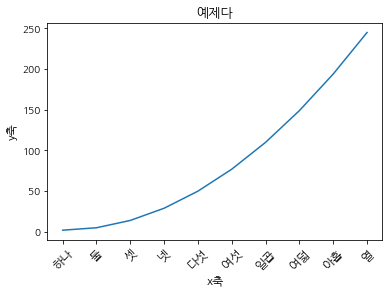

In [16]:
plt.plot([x for x in range(0, 10)], [(3*y**2)+2 for y in range(0, 10)])
plt.title("예제다", fontsize= 13)
plt.xlabel("x축", fontsize= 12)
plt.xticks(np.arange(0, 10, 1), ['하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열'], fontsize= 12, rotation= 45)
plt.ylabel("y축", fontsize= 12)
plt.show()

# 3. EDA
### **라벨 처리**
1. bias : none, others, gender
2. hate :  none, hate
3. label 처리 <br>
{0: 'none', 1: 'none', 2: 'others', 3:'others', 4:'gender', 5:'gender'} <br>
{0: 'none', 1: 'hate', 2: 'none', 3:'hate', 4:'none', 5:'hate'}

### **순서**
1. 댓글 길이 확인
2. 토큰 수 분포
  * 토큰: 띄어쓰기, 탭, 개행 등의 구분자로 구분된 단위
3. 토큰 별 길이 평균 분포
4. 명사 통계
  * mecab 사용
    1. 글자 이상
    2. 글자 이상
    3. 글자 이상
5. 형태소 통계
6. N-gram 통계
  * 2-gram 통계(형태소)
  * 3-gram 통계(형태소)


- 해보고 싶은 순위
  * 기사당 댓글 수
  * 기사당 hate column 분포 비율??

In [17]:
#bias와 hate 비교그래프
import seaborn as sns
import matplotlib.pyplot as plt

df_hate = train_df[train_df['hate'] == 'hate']
df_hate.reset_index(drop=True, inplace=True)

df_none1 = train_df[train_df['hate'] == 'none']
df_none1.reset_index(drop=True, inplace=True)

df_others = train_df[train_df['bias'] == 'others']
df_others.reset_index(drop=True, inplace=True)

df_gender = train_df[train_df['bias'] == 'gender']
df_gender.reset_index(drop=True, inplace=True)

df_not_none = pd.concat([df_others, df_gender])
df_not_none.reset_index(drop=True, inplace=True)

df_none2 = train_df[train_df['bias'] == 'none']
df_none2.reset_index(drop=True, inplace=True)

In [18]:
df_hate

,title,comment,bias,hate
0,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
1,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
2,"""샤이니 온유, 클럽 강제추행 '무혐의' 처분 받았다""",만진건 변하지 않는다 아이돌은 아이돌 좋아하는 여자들한테 이미지가 생명인데 얜 바닥...,others,hate
3,"""[POP이슈]'프듀2' 김사무엘 父, 멕시코서 숨진 채 발견→타살 의혹 제기→애도...",연예계에 외국인노동자 많네..,others,hate
4,"""슈, 동안미모+아찔한 수영복 자태로 시선강탈 """"밥을 먹을 수가 없네""""""",아이는 대부분 엄마가 원해서낳고 독박육아하고남편은 그냥 따라고는 수준!싫은 내색도 ...,gender,hate
...,...,...,...,...
4716,"""이혜정, 남편 외도 고백 """"나보다 못한 여자랑..용서 못해""""""",바람피운건 잘못은 맞지만 외모평가는 저 근거없는 자신감은 어서 나오는걸까,gender,hate
4717,"""[전문]슈퍼주니어 은혁, 웬디 사고에 """"제대로 갖춰진 환경서 춤출수 있기를""""""","빅뱅,BTS 리스펙하는 아이돌은 봐서도 슈주 리스펙하다는 아이돌은 못봤다....",none,hate
4718,"""배우 이필립, SNS 스타 연인에게 초호화 프러포즈 눈길""",아니 근데.튜닝한사람은 프러포즈받지도.결혼도못함?ㅋㅋㅋ지들은 돈없어서 못하는것들이ㅋ...,others,hate
4719,"""[SC이슈]""""마약·백스텝·김새롬 탓"""" '실형 피한' 이찬오, 이미지는 치명상(...",그러니깐 여자를 잘만나야되~징글징글한것들 만나면 인생 끝가지 돌아가게 되는듯.. 근...,gender,hate


In [19]:
df_gender

,title,comment,bias,hate
0,"""슈, 동안미모+아찔한 수영복 자태로 시선강탈 """"밥을 먹을 수가 없네""""""",아이는 대부분 엄마가 원해서낳고 독박육아하고남편은 그냥 따라고는 수준!싫은 내색도 ...,gender,hate
1,"""[종합] “올해 초 교제 여성과 재혼” 오만석, 싱글대디→새출발 (전문)""",한동안 곧휴가 즐겁겠구나 부럽다 만석아,gender,hate
2,"""[종합] """"부모님 스트레스多""""…'편스토랑' 이혜성, ♥전현무와 공개 열애 고충...",서울대 이혜성 >>>>>> 넘사 >>>>>>> 동덕여대 한혜진. 전현무도 결혼할 나...,gender,hate
3,"""안재현 구혜선 측 """"여러 문제로 결혼 생활 유지 불가, 상의 끝 이혼 결정"""" ...",여자가 나이 많으면 이혼율 높은거 RG?,gender,hate
4,"""'미우새', 김종국♥홍진영 수영장 데이트에 최고 시청률 20.7%""",유명인은 결혼 하다가 이혼하면 재상 반띵 해줘야 하는뎅..그냥 혼자 살면서 20대초...,gender,hate
...,...,...,...,...
1294,"""[단독] 문근영X김선호 '유령을 잡아라', 오늘(23일) 촬영 마무리""",지금 드라마나 보고 있을 때가 아니다. 82kg김지영보다 더 현실을 고발하는 주제가...,gender,hate
1295,이혜성아나운서 골반 화제된 이유? 운동하는 모습 보니…,와진짜 한국냄저비만률좀;;; ㅈㄴ역겨워,gender,hate
1296,"""[SC이슈]'논란의 아이콘' 설리, 이번엔 라이브 방송 중 가슴 노출→아랑곳 않는...",쿵쾅이들이 만 지랄중,gender,hate
1297,"""이혜정, 남편 외도 고백 """"나보다 못한 여자랑..용서 못해""""""",바람피운건 잘못은 맞지만 외모평가는 저 근거없는 자신감은 어서 나오는걸까,gender,hate


### 1. 댓글 길이 확인

####bias

<Figure size 432x288 with 0 Axes>

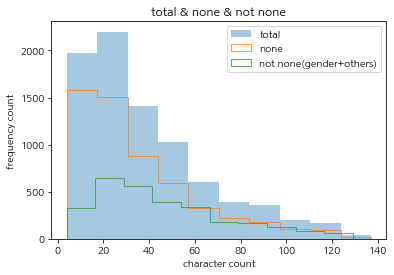

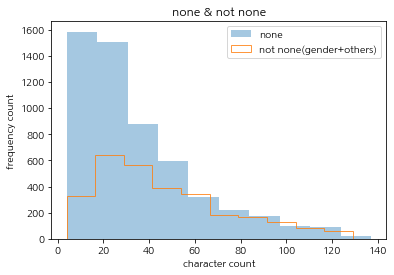

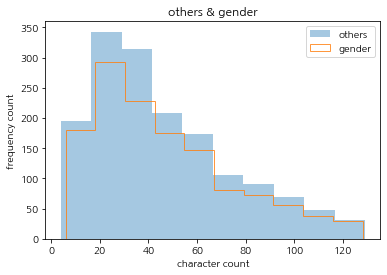

<Figure size 432x288 with 0 Axes>

In [20]:
#전체와 none, not none 비교
plt.hist(train_df['comment'].str.len(), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none2['comment'].str.len(), alpha=0.8, histtype='step', label='none')
plt.hist(df_not_none['comment'].str.len(), alpha=0.8, histtype='step', label='not none(gender+others)')
plt.title('total & none & not none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#전체와  not none 비교
plt.hist(df_none2['comment'].str.len(), alpha=0.4, histtype='bar', label='none')
plt.hist(df_not_none['comment'].str.len(), alpha=0.8, histtype='step', label='not none(gender+others)')
plt.title('none & not none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#others와 gender 비교
plt.hist(df_others['comment'].str.len(), alpha=0.4, histtype='bar', label='others')
plt.hist(df_gender['comment'].str.len(), alpha=0.8, histtype='step', label='gender')
plt.title('others & gender')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#### hate

<Figure size 432x288 with 0 Axes>

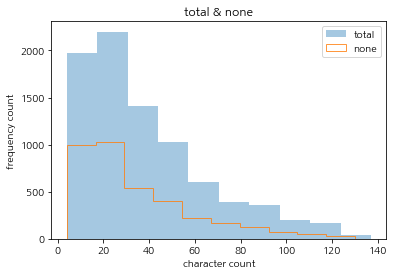

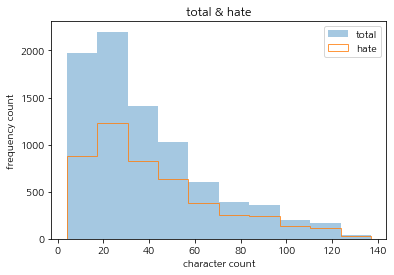

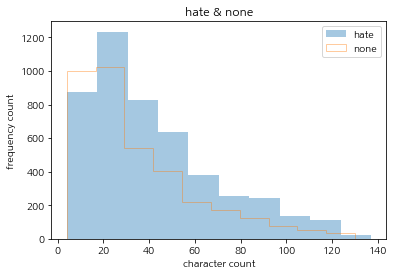

<Figure size 432x288 with 0 Axes>

In [21]:
#전체와 none비교
plt.hist(train_df['comment'].str.len(), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none1['comment'].str.len(), alpha=0.8, histtype='step', label='none')
plt.title('total & none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#전체와 hate비교
plt.hist(train_df['comment'].str.len(), alpha=0.4, histtype='bar', label='total')
plt.hist(df_hate['comment'].str.len(), alpha=0.8, histtype='step', label='hate')
plt.title('total & hate')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#hate와 none비교
plt.hist(df_hate['comment'].str.len(), alpha=0.4, histtype='bar', label='hate')
plt.hist(df_none1['comment'].str.len(), alpha=0.4, histtype='step', label='none')
plt.title('hate & none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

### 정리
* **bias**
1. none이 not none보다 2배이상 많다 -> not none이 적어서 학습잘못할수도 있다는 생각을 들음
2. 대부분의 댓글은 10~50자 사이이며, other와 gender글도 많음.

* **hate**
1. 대부분의 댓글은 10~50자 사이
2. 20자 미만 글은 증오발언이 없는 글들이 많고, 그이상은 전반적으로 증오발언이 많음.

### 2. 토큰 수 분포

### bias

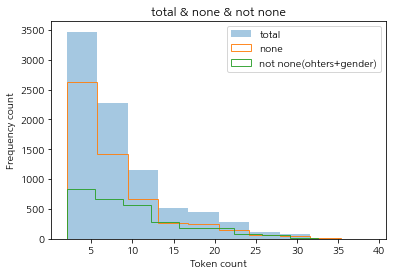

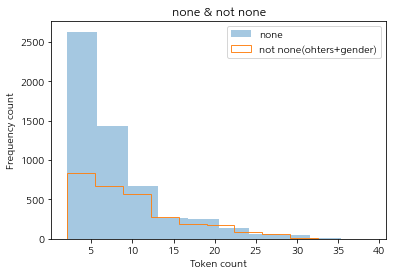

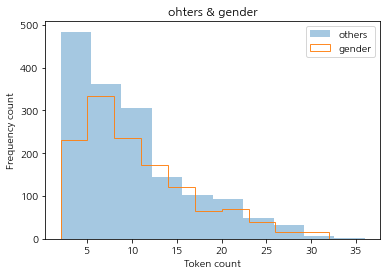

In [22]:
#토큰 별 길이
plt.title('total & none & not none')
plt.hist(train_df['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none2['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='none')
plt.hist(df_not_none['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='not none(ohters+gender)')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.figure()

plt.title('none & not none')
plt.hist(df_none2['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='none')
plt.hist(df_not_none['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='not none(ohters+gender)')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.figure()

plt.title('ohters & gender')
plt.hist(df_others['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='others')
plt.hist(df_gender['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='gender')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.show()

### hate

<Figure size 432x288 with 0 Axes>

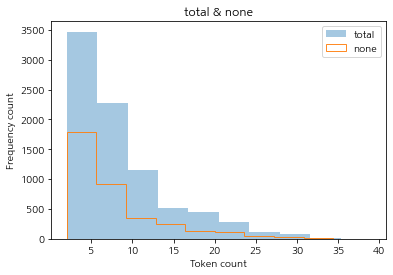

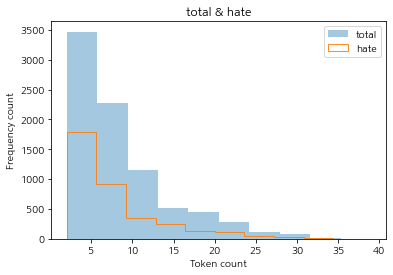

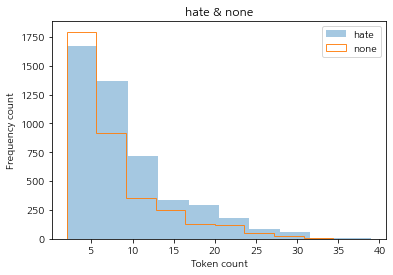

<Figure size 432x288 with 0 Axes>

In [23]:
#토큰 별 길이
plt.title('total & none')
plt.hist(train_df['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none1['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='none')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.figure()

plt.title('total & hate')
plt.hist(train_df['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none1['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='hate')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.figure()

plt.title('hate & none')
plt.hist(df_hate['comment'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='hate')
plt.hist(df_none1['comment'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='none')
plt.legend()
plt.xlabel('Token count')
plt.ylabel('Frequency count')
plt.figure()

### 정리
* **bias**
1. 대부분 댓글은 토큰 수가 10개이하로 이루어짐
2. 띄워쓰기가 10번정도 됐다고 유추 가능
3. bias에서는 others가 gender보다 10개 이하의 토큰 수가 많다

* **hate**
1. 대부분 댓글은 토큰 수가 10개이하로 이루어짐
2. 띄워쓰기가 10번정도 됐다고 유추 가능
3. hate에서는 10개 이하의 토큰으로 이루어진 댓글이 상당히 많음!

### 3. 명사통계

* 형태소 분석기 mecab을 사용
* 1 글자 이상
* 2 글자 이상
* 3 글자 이상

In [24]:
!pip install mecab-python3

     |████████████████████████████████| 574 kB 4.2 MB/s 


In [25]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [26]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   504k      0  0:00:02  0:00:02 --:--:-- 1501k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [27]:
# 데이터 준비
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
m = Mecab()

comment = train_df['comment'].to_list()
#bias
comment_others = df_others['comment'].to_list()
comment_gender = df_gender['comment'].to_list()
comment_none2 = df_none2['comment'].to_list()
comment_not_none = df_not_none['comment'].to_list()
#hate
comment_none1 = df_none1['comment'].to_list()
comment_hate = df_hate['comment'].to_list()

### 1글자 이상

In [28]:
# 1 글자 이상
def get_comments_ranking(df):
    n_corpus = []
    for c in df:
        n_corpus += m.nouns(c)

    count = collections.Counter(n_corpus)
    most = count.most_common()

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [29]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking(comment)
#bias
cr_others, cr_others_c = get_comments_ranking(comment_others)
cr_gender, cr_gender_c = get_comments_ranking(comment_gender)
cr_none2, cr_none2_c = get_comments_ranking(comment_none2)
cr_not_none, cr_not_none_c = get_comments_ranking(comment_not_none)

#hate
cr_hate, cr_hate_c = get_comments_ranking(comment_hate)
cr_none1, cr_none1_c = get_comments_ranking(comment_none1)

### bias & hate

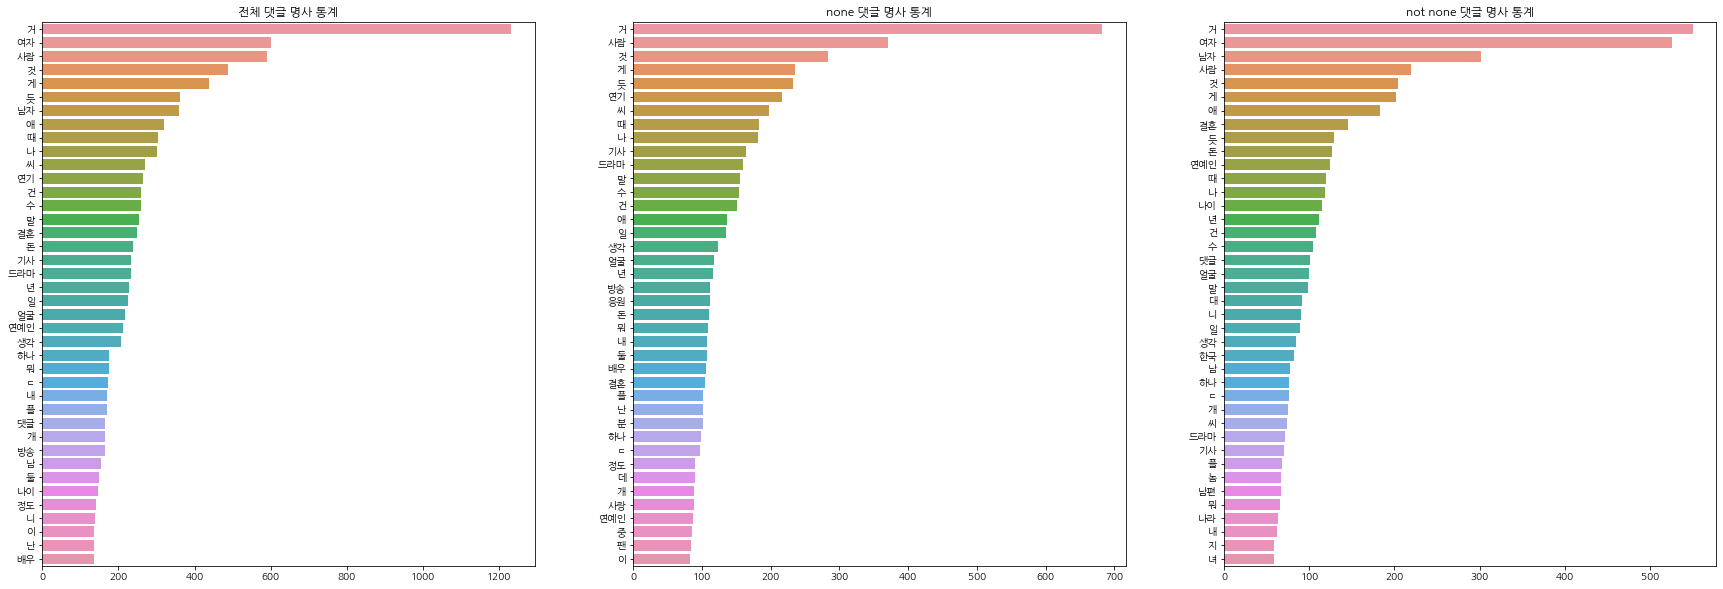

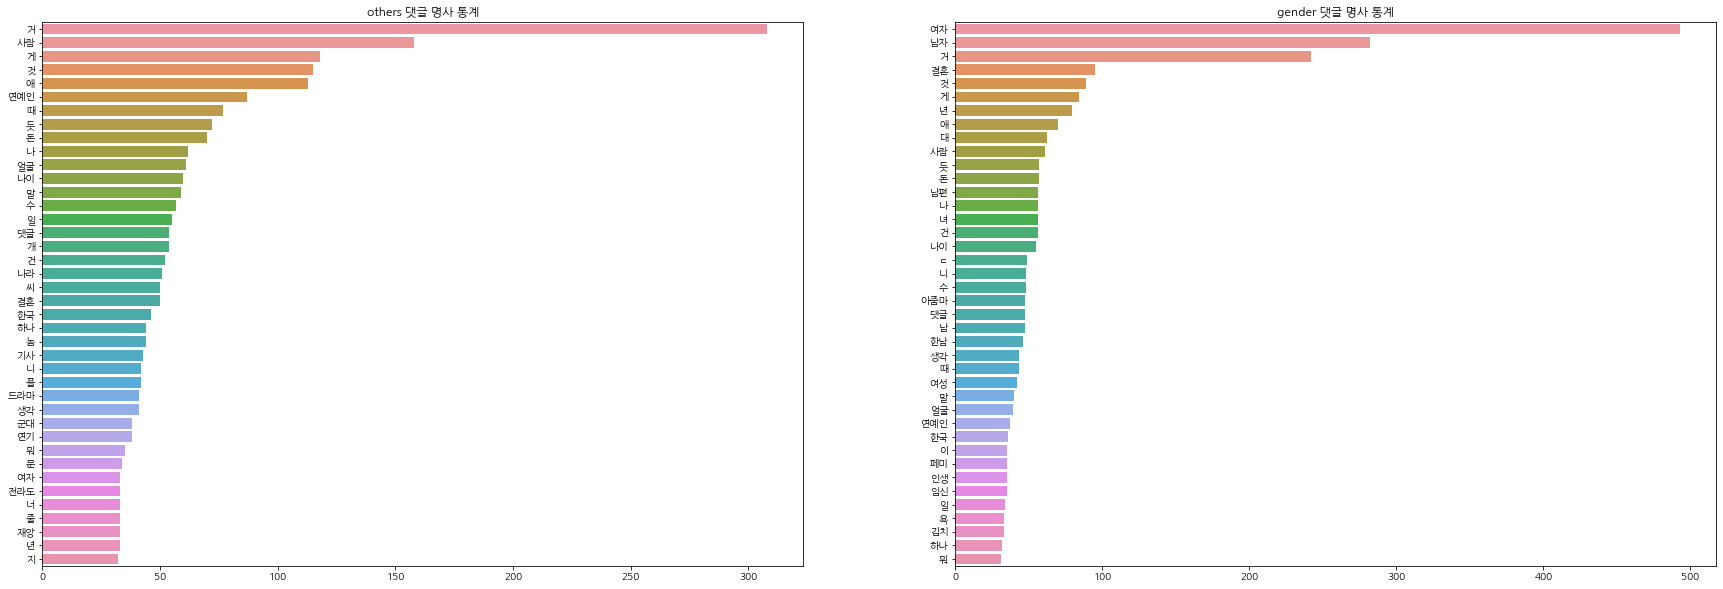

In [30]:
# total, none, not_none 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none2_c, y=cr_none2, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_not_none_c, y=cr_not_none, ax=ax[2])
ax[2].set_title('not none 댓글 명사 통계')
plt.show()

# bias 댓글중 others와 gender 비교
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0] = sns.barplot(x=cr_others_c, y=cr_others, ax=ax[0])
ax[0].set_title('others 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_gender_c, y=cr_gender, ax=ax[1])
ax[1].set_title('gender 댓글 명사 통계')

plt.show()

### hate

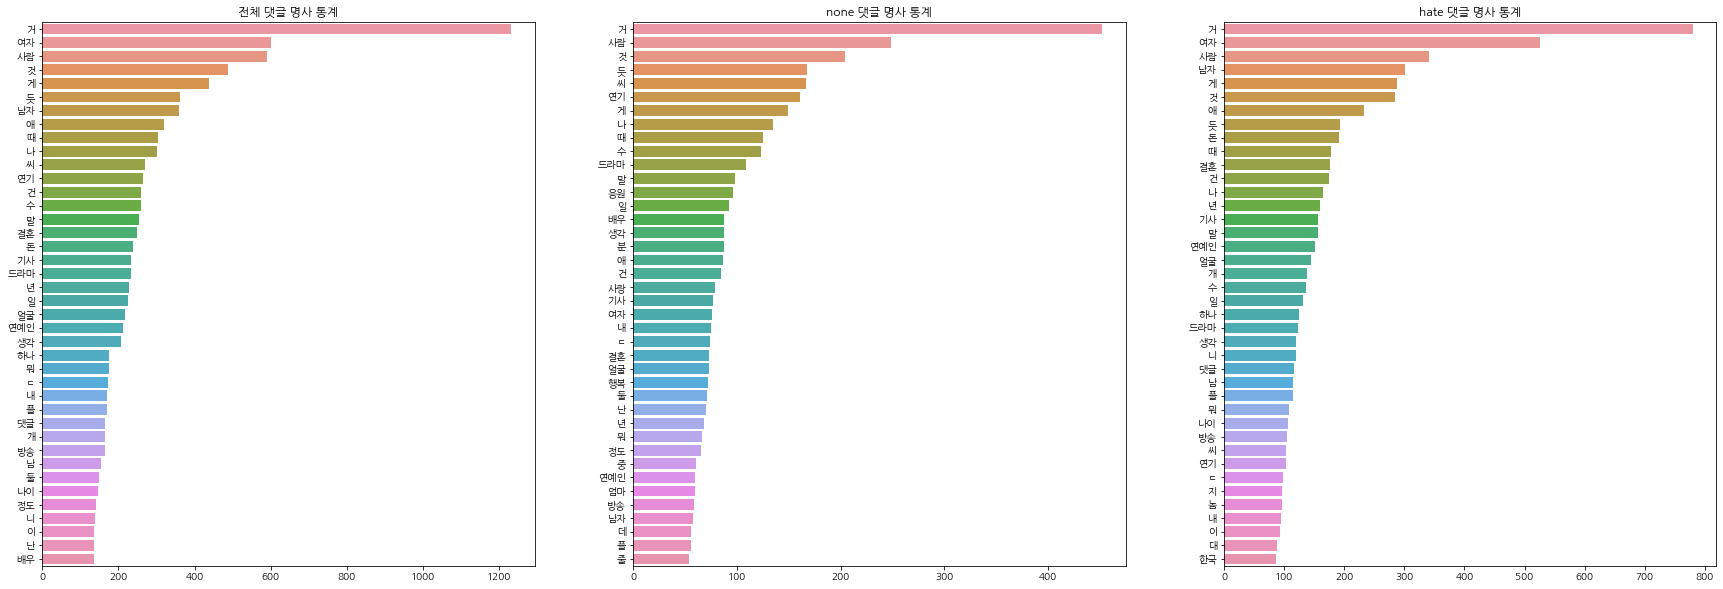

In [31]:
# total, none, not_none 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none1_c, y=cr_none1, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_hate_c, y=cr_hate, ax=ax[2])
ax[2].set_title('hate 댓글 명사 통계')

plt.show()

In [32]:
# 전체 랭킹 데이터 프레임으로 비교
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
#bias
ranking['others_w'] = cr_others
ranking['others_c'] = cr_others_c
ranking['gender_w'] = cr_gender
ranking['gender_c'] = cr_gender_c
ranking['none2_w'] = cr_none2
ranking['none2_c'] = cr_none2_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
#hate
ranking['none_w'] = cr_none1
ranking['none_c'] = cr_none1_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c

In [33]:
ranking

,total_w,total_c,others_w,others_c,gender_w,gender_c,none2_w,none2_c,not_none_w,not_none_c,none_w,none_c,hate_w,hate_c
0,거,1232,거,308,여자,493,거,682,거,550,거,452,거,780
1,여자,601,사람,158,남자,282,사람,371,여자,526,사람,249,여자,525
2,사람,590,게,118,거,242,것,284,남자,302,것,204,사람,341
3,것,488,것,115,결혼,95,게,235,사람,219,듯,168,남자,301
4,게,437,애,113,것,89,듯,232,것,204,씨,167,게,288
5,듯,361,연예인,87,게,84,연기,216,게,202,연기,161,것,284
6,남자,359,때,77,년,79,씨,197,애,183,게,149,애,233
7,애,320,듯,72,애,70,때,183,결혼,145,나,135,듯,193
8,때,303,돈,70,대,62,나,182,듯,129,때,125,돈,192
9,나,300,나,62,사람,61,기사,164,돈,127,수,123,때,178


##2 글자 이상

In [34]:
def get_comments_ranking2(df):
    n_corpus = []
    for c in df:
        for n in m.nouns(c):
            if len(n)>1:
                n_corpus.append(n)

    count = collections.Counter(n_corpus)
    most = count.most_common() # 빈도 수 순으로 추출

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [35]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking2(comment)
#bias
cr_others, cr_others_c = get_comments_ranking2(comment_others)
cr_gender, cr_gender_c = get_comments_ranking2(comment_gender)
cr_none2, cr_none2_c = get_comments_ranking2(comment_none2)
cr_not_none, cr_not_none_c = get_comments_ranking2(comment_not_none)

#hate
cr_hate, cr_hate_c = get_comments_ranking2(comment_hate)
cr_none1, cr_none1_c = get_comments_ranking2(comment_none1)

### bias

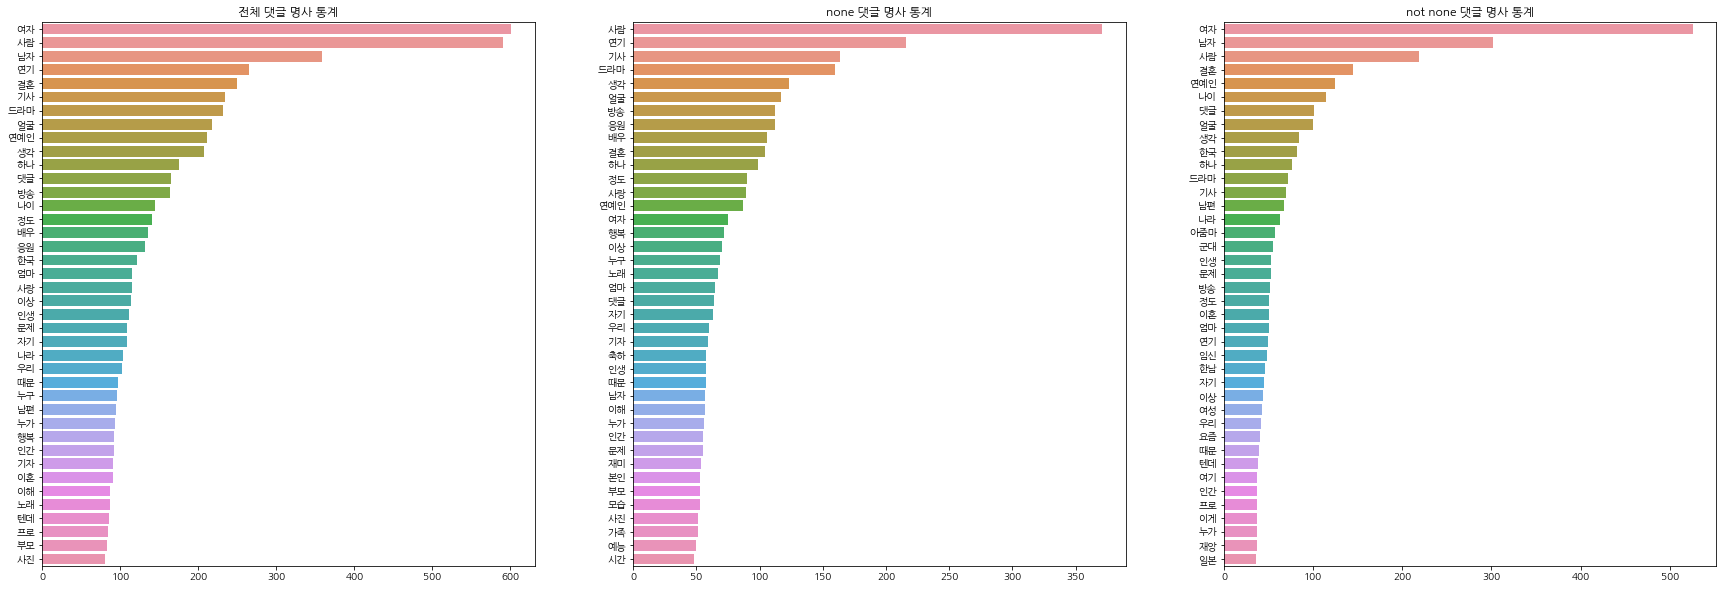

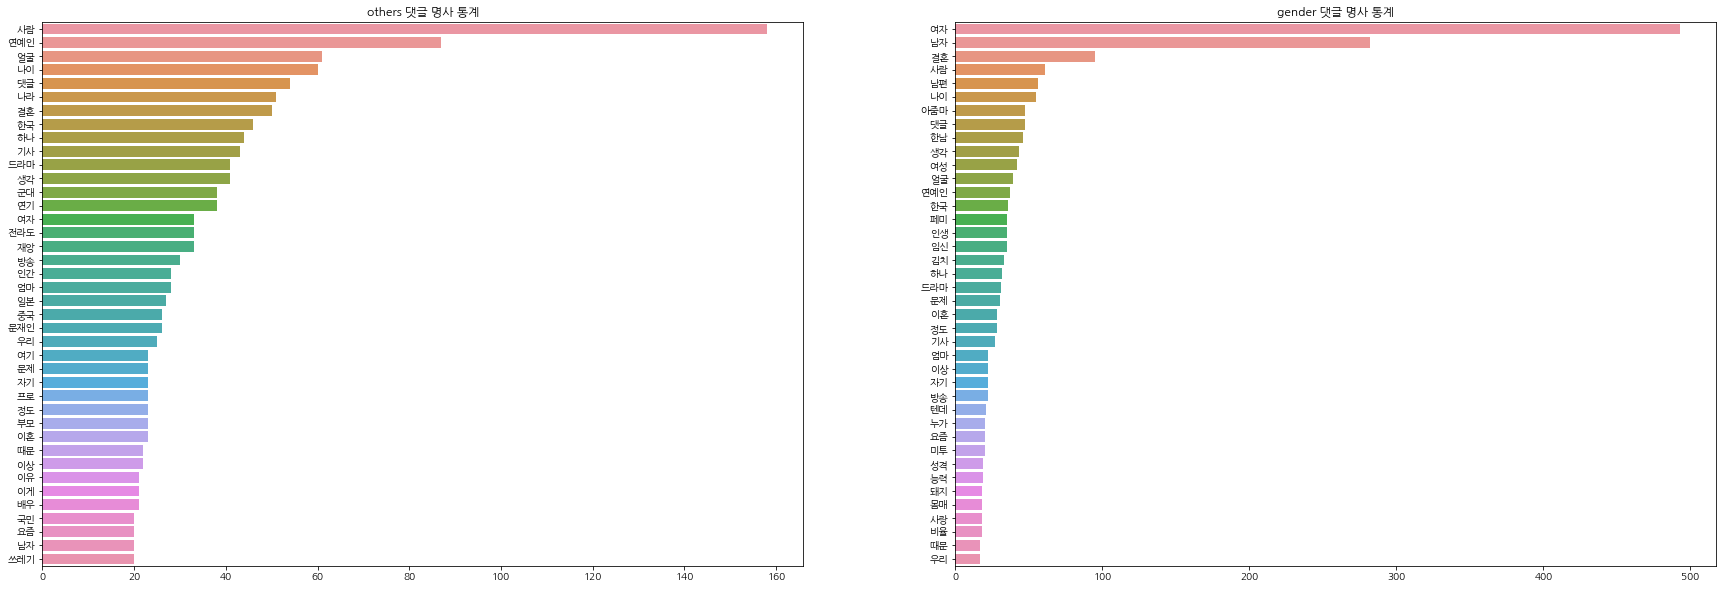

In [36]:
# total, none, not_none 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none2_c, y=cr_none2, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_not_none_c, y=cr_not_none, ax=ax[2])
ax[2].set_title('not none 댓글 명사 통계')
plt.show()

# bias 댓글중 others와 gender 비교
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0] = sns.barplot(x=cr_others_c, y=cr_others, ax=ax[0])
ax[0].set_title('others 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_gender_c, y=cr_gender, ax=ax[1])
ax[1].set_title('gender 댓글 명사 통계')

plt.show()

### hate

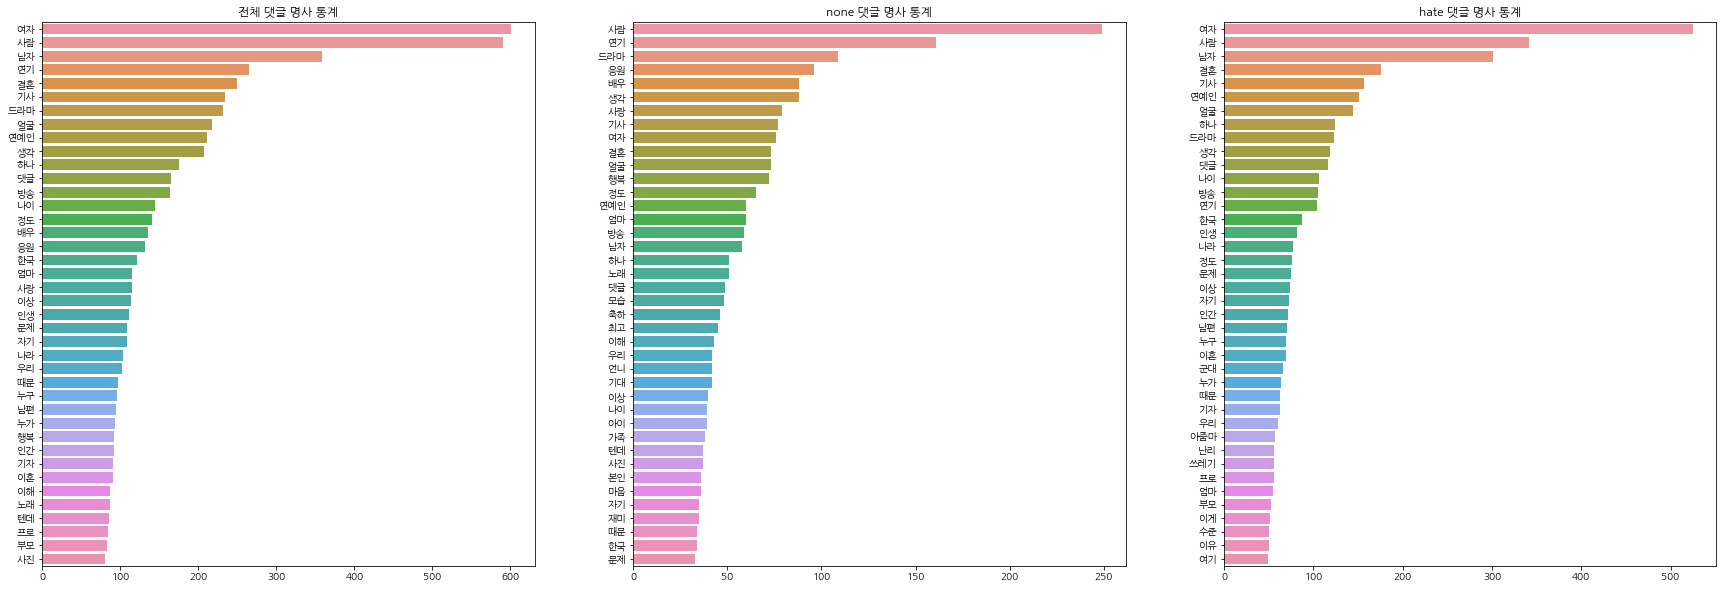

In [37]:
# total, none, hate 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none1_c, y=cr_none1, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_hate_c, y=cr_hate, ax=ax[2])
ax[2].set_title('hate 댓글 명사 통계')

plt.show()

In [38]:
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
#bias
ranking['others_w'] = cr_others
ranking['others_c'] = cr_others_c
ranking['gender_w'] = cr_gender
ranking['gender_c'] = cr_gender_c
ranking['none2_w'] = cr_none2
ranking['none2_c'] = cr_none2_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
#hate
ranking['none_w'] = cr_none1
ranking['none_c'] = cr_none1_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c

In [39]:
ranking

,total_w,total_c,others_w,others_c,gender_w,gender_c,none2_w,none2_c,not_none_w,not_none_c,none_w,none_c,hate_w,hate_c
0,여자,601,사람,158,여자,493,사람,371,여자,526,사람,249,여자,525
1,사람,590,연예인,87,남자,282,연기,216,남자,302,연기,161,사람,341
2,남자,359,얼굴,61,결혼,95,기사,164,사람,219,드라마,109,남자,301
3,연기,265,나이,60,사람,61,드라마,160,결혼,145,응원,96,결혼,176
4,결혼,249,댓글,54,남편,56,생각,123,연예인,124,배우,88,기사,157
5,기사,234,나라,51,나이,55,얼굴,117,나이,115,생각,88,연예인,151
6,드라마,232,결혼,50,아줌마,47,방송,112,댓글,101,사랑,79,얼굴,144
7,얼굴,217,한국,46,댓글,47,응원,112,얼굴,100,기사,77,하나,124
8,연예인,211,하나,44,한남,46,배우,106,생각,84,여자,76,드라마,123
9,생각,207,기사,43,생각,43,결혼,104,한국,82,결혼,73,생각,119


### 3글자 이상

In [40]:
def get_comments_ranking3(df):
    n_corpus = []
    for c in df:
        for n in m.nouns(c):
            if len(n)>2:
                n_corpus.append(n)

    count = collections.Counter(n_corpus)
    most = count.most_common() # 빈도 수 순으로 추출

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [41]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking3(comment)
#bias
cr_others, cr_others_c = get_comments_ranking3(comment_others)
cr_gender, cr_gender_c = get_comments_ranking3(comment_gender)
cr_none2, cr_none2_c = get_comments_ranking3(comment_none2)
cr_not_none, cr_not_none_c = get_comments_ranking3(comment_not_none)

#hate
cr_hate, cr_hate_c = get_comments_ranking3(comment_hate)
cr_none1, cr_none1_c = get_comments_ranking3(comment_none1)

### bias

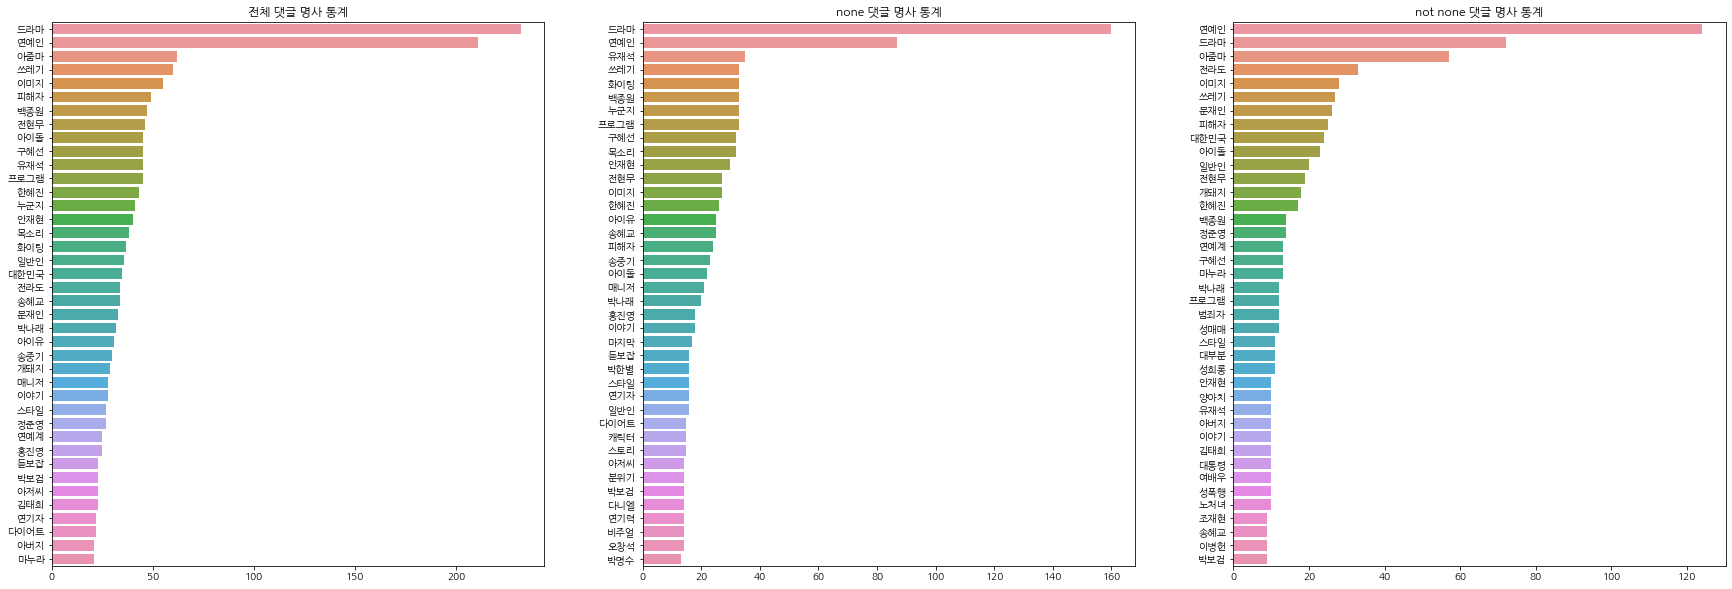

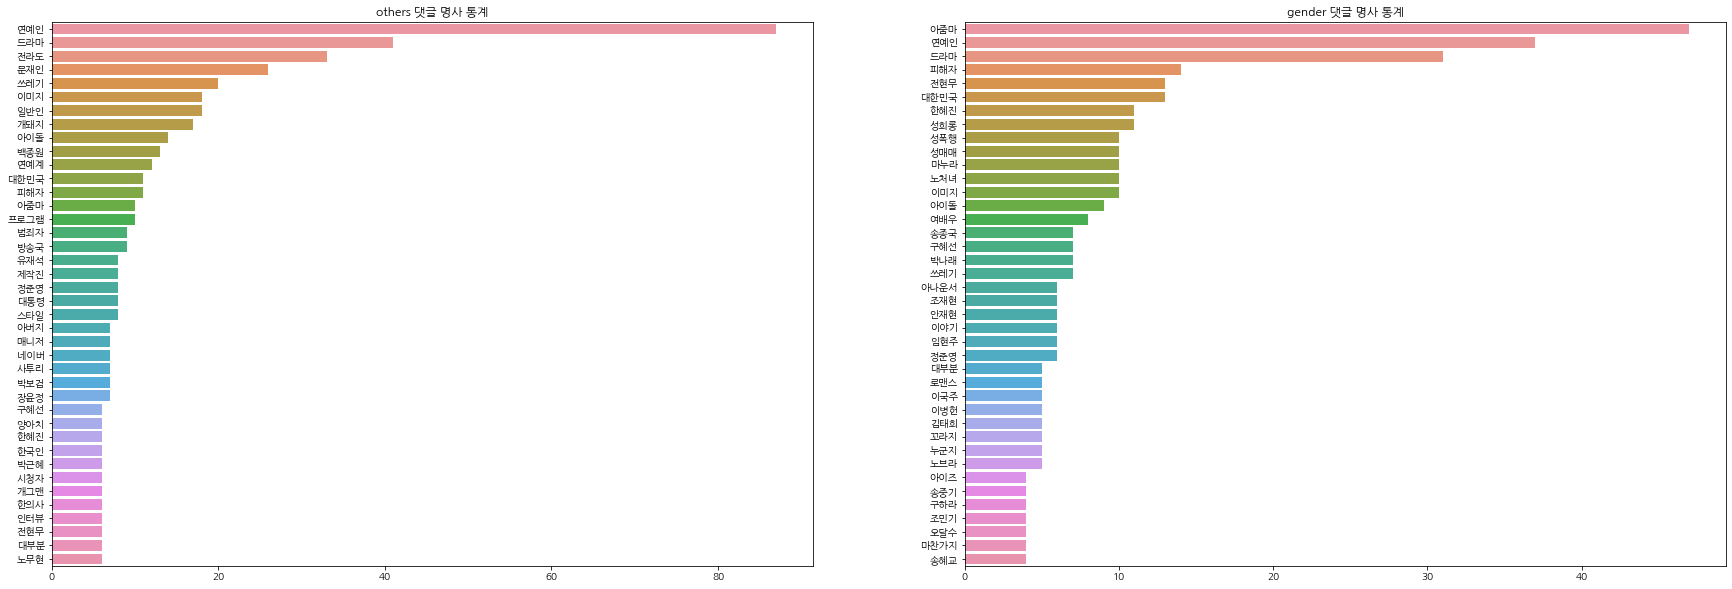

In [42]:
# total, none, not_none 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none2_c, y=cr_none2, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_not_none_c, y=cr_not_none, ax=ax[2])
ax[2].set_title('not none 댓글 명사 통계')
plt.show()

# bias 댓글중 others와 gender 비교
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0] = sns.barplot(x=cr_others_c, y=cr_others, ax=ax[0])
ax[0].set_title('others 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_gender_c, y=cr_gender, ax=ax[1])
ax[1].set_title('gender 댓글 명사 통계')

plt.show()

### hate

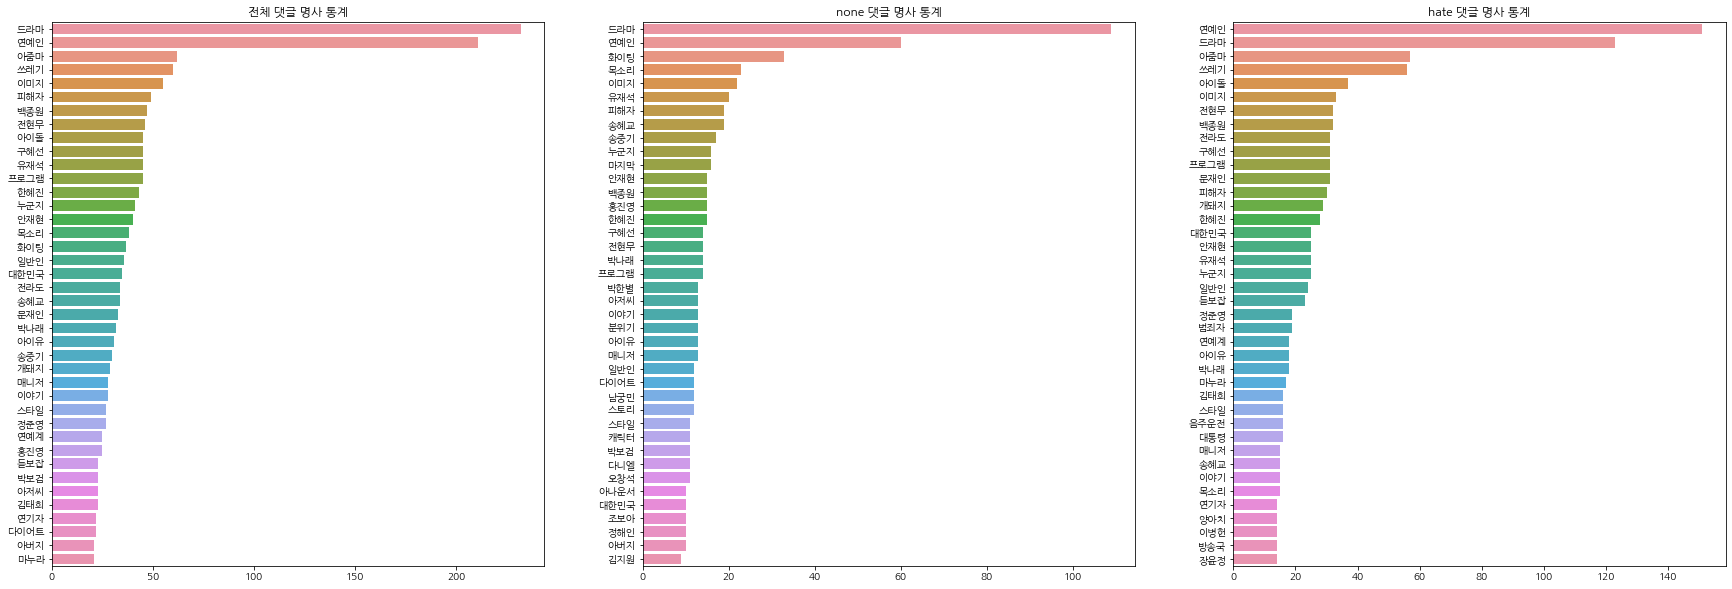

In [43]:
# total, none, hate 순 확인
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0] = sns.barplot(x=cr_c, y=cr, ax=ax[0])
ax[0].set_title('전체 댓글 명사 통계')

ax[1] = sns.barplot(x=cr_none1_c, y=cr_none1, ax=ax[1])
ax[1].set_title('none 댓글 명사 통계')

ax[2] = sns.barplot(x=cr_hate_c, y=cr_hate, ax=ax[2])
ax[2].set_title('hate 댓글 명사 통계')

plt.show()

In [44]:
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
#bias
ranking['others_w'] = cr_others
ranking['others_c'] = cr_others_c
ranking['gender_w'] = cr_gender
ranking['gender_c'] = cr_gender_c
ranking['none2_w'] = cr_none2
ranking['none2_c'] = cr_none2_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
#hate
ranking['none_w'] = cr_none1
ranking['none_c'] = cr_none1_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c

In [45]:
ranking

,total_w,total_c,others_w,others_c,gender_w,gender_c,none2_w,none2_c,not_none_w,not_none_c,none_w,none_c,hate_w,hate_c
0,드라마,232,연예인,87,아줌마,47,드라마,160,연예인,124,드라마,109,연예인,151
1,연예인,211,드라마,41,연예인,37,연예인,87,드라마,72,연예인,60,드라마,123
2,아줌마,62,전라도,33,드라마,31,유재석,35,아줌마,57,화이팅,33,아줌마,57
3,쓰레기,60,문재인,26,피해자,14,쓰레기,33,전라도,33,목소리,23,쓰레기,56
4,이미지,55,쓰레기,20,전현무,13,화이팅,33,이미지,28,이미지,22,아이돌,37
5,피해자,49,이미지,18,대한민국,13,백종원,33,쓰레기,27,유재석,20,이미지,33
6,백종원,47,일반인,18,한혜진,11,누군지,33,문재인,26,피해자,19,전현무,32
7,전현무,46,개돼지,17,성희롱,11,프로그램,33,피해자,25,송혜교,19,백종원,32
8,아이돌,45,아이돌,14,성폭행,10,구혜선,32,대한민국,24,송중기,17,전라도,31
9,구혜선,45,백종원,13,성매매,10,목소리,32,아이돌,23,누군지,16,구혜선,31


## 데이터 전처리
* bias, hate 조합으로 label column 생성
* 한글이 아닌거 제거(특수 문자, 숫자, 자음, 모음등)
* 토크나이징 하기 위해 제거 했으나 해당 과정을 생략하고 학습 시도 해볼 수 있음.

### 1. bias, hate 조합으로 label column 생성

In [15]:
# 두 라벨의 가능한 모든 조합 만들기
combinations = np.array(np.meshgrid(train_df.bias.unique(), train_df.hate.unique())).T.reshape(-1,2)

print(combinations)

[['none' 'none']
 ['none' 'hate']
 ['others' 'none']
 ['others' 'hate']
 ['gender' 'none']
 ['gender' 'hate']]


In [16]:
# bias, hate 컬럼을 합친 것
bias_hate = list(np.array([train_df['bias'].values, train_df['hate'].values]).T.reshape(-1,2))

print(bias_hate[:5])

[array(['none', 'none'], dtype=object), array(['none', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['none', 'none'], dtype=object), array(['none', 'none'], dtype=object)]


In [17]:
labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

train_df['label'] = labels
train_df.head(5)

,title,comment,bias,hate,label
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none,0
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate,3
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none,0
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none,0


#### 2. 한글 및 영어, 특수문자 제거

In [ ]:
# #comment
# train_df['comment'] = train_df['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
# test_df['comment'] = test_df['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
# train_df.head(5)

In [ ]:
# #title
# train_df['title'] = train_df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
# test_df['title'] = test_df['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
# train_df.head(5)

## Text Data Augumentation

### **-데이터 증강**

#### 1. ktextaug
 bias에서 Not none 데이터만 비중 늘리기

In [50]:
!pip install ktextaug

     |████████████████████████████████| 152 kB 4.2 MB/s 
     |████████████████████████████████| 3.5 MB 60.7 MB/s 
     |████████████████████████████████| 6.4 MB 24.5 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 73.2 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 65 kB 1.3 MB/s 
     |████████████████████████████████| 198 kB 74.3 MB/s 
     |████████████████████████████████| 6.5 MB 41.5 MB/s 
     |████████████████████████████████| 596 kB 84.7 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 895 kB 85.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=d8939eb2b789b34b8fb45c5c066401da8f002d642a88b18f2e160cd7a1ec3bb9
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb

In [51]:
#예시
from ktextaug import TextAugmentation

sample_text = '달리는 기차 위에 중립은 없다. 미국의 사회 운동가이자 역사학자인 하워드 진이 남긴 격언이다.'
sample_texts = ['프로그램 개발이 끝나고 서비스가 진행된다.', '도움말을 보고 싶다면 --help를 입력하면 된다.']
agent = TextAugmentation(tokenizer="mecab", num_processes=1) # num_process 가 -1 일시 자동으로 가능한 process의 절반으로 할당
print(agent.generate(sample_text))    # default is back_translation
print(agent.generate(sample_texts))

움직이는 기차에는 중립이 없습니다. 미국의 활동가이자 역사가인 하워드 진.


  0%|          | 0/2 [00:00<?, ?it/s]

['프로그램 개발이 완료된 후 서비스를 진행합니다.', '도움말을 보려면 --help를 입력하십시오.']


In [199]:
#for문으로 다돌리면 시간이오래걸려 1000개단위로 끊어주기 위해 title기준으로 정렬
df_not_none = df_not_none.sort_values("comment").reset_index(drop=True)
df_not_none

,title,comment,bias,hate
0,"""산이→손수현→제리케이, 연예계로 확산된 남녀혐오 논란ing [종합]""","""맞을 만한 """"사람""""이란게 없는거지. 쟤들이 사람같아보임? 사람이라고 생각함?...""",others,hate
1,"""'같이 살래요' 장미희, 치매 증세 """"서연우가 누구야?"""" (종합)""","""쌩뚱맞게 60대최반엌 치매라니 그것도 곱게 사는 사모님이- -"""" 알콜중독도 아니...",others,hate
2,조수애♥박서원 '두산家 마음을 훔친 조수애 아나운서 미모',"""아나운서는 목표가 아니었지ㅋㅋㅋㅋㅋㅋㅋㅋㅋ재벌하고 결혼하자마자 바로 은퇴하네ㅋㅋㅋ...",others,hate
3,[DA:이슈] ‘구하라 비보’ 최종범 항소심에 영향?…법조계 “‘공소권 없음’ 아냐”,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,gender,hate
4,"""배우 마크 월버그, 성차별 논란에 출연료 16억원 전액 기부""","100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",gender,hate
...,...,...,...,...
2872,"""낸시랭, 왕진진과 결혼 후 근황..흑발 미녀의 청순""",흑발미녀???장난똥때리냐?????마녀란 말도 아깝다!!!,others,hate
2873,"""""""여성 혐오NO""""..산이, '이수역 폭행' 영상 게재→신곡 '페미니스트' 발표...",히잌! 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ( ° ͜ʖ͡°)╭∩╮,gender,hate
2874,"""""""이 정도면 신드롬""""..'연예인들의 연예인' 양준일, 이지혜→김이나→신현준도 ...",히트곡이 없는데 추억팔이가되는 놀라운 조선식 방송국연예매니징ㅋㅋ 기획사 소속사 걍 ...,others,hate
2875,"""""""임신 그리고 유산""""..'동상이몽2' 한고은♥신영수의 고백(종합)""",힘내세요 한고은님! btw 아래 한남충 글 뭐냐??풉...평생 연애하나 못하고 홀애...,gender,hate


In [200]:
#한문장 꺼내서 augmentation 되는지 확인
agent.generate(df_not_none["comment"][0])

'"사람"에 대한 정확한 단어는 없습니다. 당신은 사람처럼 보이나요? 당신이 사람이라고 생각합니까? ..."'

In [146]:
agent.generate(df_not_none["comment"][0],
               mode="noise_add",
               prob=0.4,
               noise_mode=['phonological_change', 'vowel_change', 'jamo_split'])

'프듀출신이면 롤모델로 워너원 말했ㅇㅓㅇㅑ지 요즘 더 잘나ㄱㅏ는 것도 워ㄴㅓ원ㅇㅣ고'

In [147]:
# comment 문장들 augmentation 시키기
# 1시간 소요
aug_comment = []
for i in range(1000):
  aug_comment.append(agent.generate(df_not_none["comment"][i],
                                    mode="noise_add",
                                    prob=0.4,
                                    noise_mode=['phonological_change', 'vowel_change', 'jamo_split']))

KeyboardInterrupt: ignored

In [148]:
aug_comment

['프듀출신이면 롤묘델로 워녀원 말했여아지 요즘 뎌 잘나갸는 것도 워너원이고',
 '좀 뜰만한ㅇㅐ들이 방탄ㅇㅣ들 언급했으면...',
 '방탄이 롤모델ㅇㅣ면 엑소에 밀려 ㄱㅖ속 2인자로 남을텐데??',
 '도시어부 보고 뚀 땨랴하는 겨 같은데 에후ㅉㅉ안봐도 노잼',
 '역시 여자는 나이갸 깡패다 깡패 .',
 '계집ㅅㅐ끼덜 젖들젖들 봐라~ㅋ ㄱㅖ집새끼 나ㅇㅣ가 ㅈㅓ ㄴㅏ이대였으면 상ㅍㅖ되어 임신 불구년인디...ㅋ',
 '역시 젊은어자랑 결혼하니 애도 쑥쑥 금방 낳네요. 좋네.',
 'ㄴㅏ보다 20살많은ㅅㅏ람ㅇㅣ 좋은가 ㅠ엄마랑나랑 21살차이인데 ㅠ',
 '역ㅅㅣ 여ㅈㅏ는 젊고 싱싱한게 최고ㅇㅕ ㄴㅏㅇㅣ 30넘은 아줌ㅁㅐ들은 ㅊㅕ다도 보ㅈㅣ 말그라잉 ~',
 '아들이 왜 갚야! 똘아이들! 그러니 사기 당햐고 살지!',
 '그러지마셔오 범죄자(살인미슈) 음주운전은 살인미수예오.반성땨위 없여오 이런 글 뵤면셔 언젠간 악플때문이라면셔 마시고 실수했다고 햐겠죠?? 쯧쯧 뉴굴만냐나오 .그러지먀서오 다른 뇨쳐너들에게 양보하세요 .',
 '기센여자랑살ㄹㅕ면 바보가되야됨',
 'ㄷㅏ이ㅇㅓ트를 해도 ㅁㅓㄹㅣ크기는 ㅇㅓ떻ㄱㅔ 할수ㄱㅏ 없구나....',
 'ㅋㅋㅋ월래도 이쁜이레 ㅋㅋㅋ 쿵쾅이들아 니네는 원래도 빻앗고 살빼도 빻앗어 ㅋㅋㅋㅋ',
 '연예인들 살ㅃㅐ는거 일반인들은 따라하ㅈㅣ 마라 절대 안된ㄷㅏ 돈을 투ㅈㅏ해야 ㄱㅏ능한ㄱㅓ',
 '쿵쾅이들ㅇㅣ 불편해할 기사입니ㄷㅏ.',
 '한혜진과 헤여진지 얼마나 됐댜교,그새 열애를~~ㅋㅋㅋ',
 '한ㄴㅕ들원ㄹㅐ 부러우면 ㅇㅣ렇게댓글다는ㄱㅓㄴㅑ?ㅋㅋ',
 '천박스럽다 뭘 굳이 슈영복입은 몸을 공개꺄지저런 먀인드 머느리 ㄴㄴ',
 '아는 슴이 약한게 흠.',
 '전현무가 승리자네 얼굴은 별로여도 몸ㅁㅐ가 죽ㅇㅕ주ㄴㅣㄲㅏ',
 '이우업는악플은업다 논란이많은연애인들이악플많은건당연하다',
 '좌ㅌㅣㅂㅣㅆㅣ가 사람죽ㅇㅣ노',
 '악플문화는 좌파들이 만든 거지 다음 야고랴 악플문화에서 시작된것.',
 '40세 이상 한너들은 임신도 못햐는 사실상 쓸모

In [149]:
len(aug_comment)

857

In [150]:
#title
title = []
for i in range(857):
  title.append(df_not_none['title'][i])
#bias
bias = []
for i in range(857):
  bias.append(df_not_none['bias'][i])
#hate
hate = []
for i in range(857):
  hate.append(df_not_none['hate'][i])

In [151]:
train_df2 = pd.DataFrame({'title': title, 'comment': aug_comment, 'bias': bias, 'hate' : hate})
train_df2

,title,comment,bias,hate
0,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",프듀출신이면 롤묘델로 워녀원 말했여아지 요즘 뎌 잘나갸는 것도 워너원이고,others,hate
1,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",좀 뜰만한ㅇㅐ들이 방탄ㅇㅣ들 언급했으면...,others,hate
2,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",방탄이 롤모델ㅇㅣ면 엑소에 밀려 ㄱㅖ속 2인자로 남을텐데??,others,hate
3,"""""""180cm 괴어 영접""""'전설의 빅피쉬' 아마존 그랜드슬램 '대성공' (ft....",도시어부 보고 뚀 땨랴하는 겨 같은데 에후ㅉㅉ안봐도 노잼,others,hate
4,"""""""19살차 극복""""…정재용♥선아, 결혼 5개월만 득녀→행복한 인생 2막 [종합]""",역시 여자는 나이갸 깡패다 깡패 .,gender,none
...,...,...,...,...
852,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",우리선정이 이름만큼 몸ㅁㅐ도 선정적ㅇㅣ였ㅈㅣ...특히 우유공장은 ㅇㅓㅁㅏ무시 했지....,gender,hate
853,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",본방 보고있었는ㄷㅔ 서모씨ㄸㅐ문에 채널 돌렸습ㄴㅣㄷㅏ,others,hate
854,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",이선정씨 공항장애앓았댜는게 안타값네요.근데 요즘 언제뷰턴갸 공항장애갸 연예인병이 된...,others,hate
855,"""[POP이슈]""""국민 MC는 건드리면 안 되나?""""..가세연, 유재석-김태호 역풍...",강변 야즐이 불쌍햐댜. 티비에 얼굴됴 팔렸는데,others,hate


In [152]:
# train_df2 두 라벨의 가능한 모든 조합 만들기
combinations = np.array(np.meshgrid(train_df2.bias.unique(), train_df2.hate.unique())).T.reshape(-1,2)

print(combinations)

bias_hate = list(np.array([train_df2['bias'].values, train_df2['hate'].values]).T.reshape(-1,2))

print(bias_hate[:5])

labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

train_df2['label'] = labels
train_df2.head(5)

[['others' 'hate']
 ['others' 'none']
 ['gender' 'hate']
 ['gender' 'none']]
[array(['others', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['gender', 'none'], dtype=object)]


,title,comment,bias,hate,label
0,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",프듀출신이면 롤묘델로 워녀원 말했여아지 요즘 뎌 잘나갸는 것도 워너원이고,others,hate,0
1,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",좀 뜰만한ㅇㅐ들이 방탄ㅇㅣ들 언급했으면...,others,hate,0
2,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",방탄이 롤모델ㅇㅣ면 엑소에 밀려 ㄱㅖ속 2인자로 남을텐데??,others,hate,0
3,"""""""180cm 괴어 영접""""'전설의 빅피쉬' 아마존 그랜드슬램 '대성공' (ft....",도시어부 보고 뚀 땨랴하는 겨 같은데 에후ㅉㅉ안봐도 노잼,others,hate,0
4,"""""""19살차 극복""""…정재용♥선아, 결혼 5개월만 득녀→행복한 인생 2막 [종합]""",역시 여자는 나이갸 깡패다 깡패 .,gender,none,3


In [153]:
#증강시킨 데이터 저장하기
train_df2.to_csv('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data/aug_train2.csv',index=False)

In [155]:
#증강시킨 데이터 불러오기
train_df2 = pd.read_csv('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data/aug_train2.csv')
# train_df2 = train_df2.drop("Unnamed: 0", axis=1)
train_df2

,title,comment,bias,hate,label
0,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",프듀출신이면 롤묘델로 워녀원 말했여아지 요즘 뎌 잘나갸는 것도 워너원이고,others,hate,0
1,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",좀 뜰만한ㅇㅐ들이 방탄ㅇㅣ들 언급했으면...,others,hate,0
2,"""""""'프듀2' 출신 합류"""" 느와르 """"롤모델 방탄소년단""""(종합)""",방탄이 롤모델ㅇㅣ면 엑소에 밀려 ㄱㅖ속 2인자로 남을텐데??,others,hate,0
3,"""""""180cm 괴어 영접""""'전설의 빅피쉬' 아마존 그랜드슬램 '대성공' (ft....",도시어부 보고 뚀 땨랴하는 겨 같은데 에후ㅉㅉ안봐도 노잼,others,hate,0
4,"""""""19살차 극복""""…정재용♥선아, 결혼 5개월만 득녀→행복한 인생 2막 [종합]""",역시 여자는 나이갸 깡패다 깡패 .,gender,none,3
...,...,...,...,...,...
852,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",우리선정이 이름만큼 몸ㅁㅐ도 선정적ㅇㅣ였ㅈㅣ...특히 우유공장은 ㅇㅓㅁㅏ무시 했지....,gender,hate,2
853,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",본방 보고있었는ㄷㅔ 서모씨ㄸㅐ문에 채널 돌렸습ㄴㅣㄷㅏ,others,hate,0
854,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",이선정씨 공항장애앓았댜는게 안타값네요.근데 요즘 언제뷰턴갸 공항장애갸 연예인병이 된...,others,hate,0
855,"""[POP이슈]""""국민 MC는 건드리면 안 되나?""""..가세연, 유재석-김태호 역풍...",강변 야즐이 불쌍햐댜. 티비에 얼굴됴 팔렸는데,others,hate,0


In [156]:
#기존 데이터랑 합치기
train_df3 = pd.concat([train_df, train_df2]).reset_index(drop=True)
train_df3

,title,comment,bias,hate,label
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none,0
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate,3
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none,0
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none,0
...,...,...,...,...,...
9219,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",우리선정이 이름만큼 몸ㅁㅐ도 선정적ㅇㅣ였ㅈㅣ...특히 우유공장은 ㅇㅓㅁㅏ무시 했지....,gender,hate,2
9220,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",본방 보고있었는ㄷㅔ 서모씨ㄸㅐ문에 채널 돌렸습ㄴㅣㄷㅏ,others,hate,0
9221,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",이선정씨 공항장애앓았댜는게 안타값네요.근데 요즘 언제뷰턴갸 공항장애갸 연예인병이 된...,others,hate,0
9222,"""[POP이슈]""""국민 MC는 건드리면 안 되나?""""..가세연, 유재석-김태호 역풍...",강변 야즐이 불쌍햐댜. 티비에 얼굴됴 팔렸는데,others,hate,0


In [159]:
# #합친 데이터 저장하기
# train_df3.to_csv('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data/concat_train2.csv', index=False)

In [157]:
# comment 열에서 중복인 내용이 있다면 중복 제거
train_df3.drop_duplicates(subset = ['comment'], inplace=True)

In [158]:
train_df3

,title,comment,bias,hate,label
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none,0
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate,3
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none,0
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none,0
...,...,...,...,...,...
9219,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",우리선정이 이름만큼 몸ㅁㅐ도 선정적ㅇㅣ였ㅈㅣ...특히 우유공장은 ㅇㅓㅁㅏ무시 했지....,gender,hate,2
9220,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",본방 보고있었는ㄷㅔ 서모씨ㄸㅐ문에 채널 돌렸습ㄴㅣㄷㅏ,others,hate,0
9221,"""[POP이슈]""""공황장애 앓아"""" 이선정, LJ 이혼→황지만 결별까지 심경 고백""",이선정씨 공항장애앓았댜는게 안타값네요.근데 요즘 언제뷰턴갸 공항장애갸 연예인병이 된...,others,hate,0
9222,"""[POP이슈]""""국민 MC는 건드리면 안 되나?""""..가세연, 유재석-김태호 역풍...",강변 야즐이 불쌍햐댜. 티비에 얼굴됴 팔렸는데,others,hate,0


<Figure size 432x288 with 0 Axes>

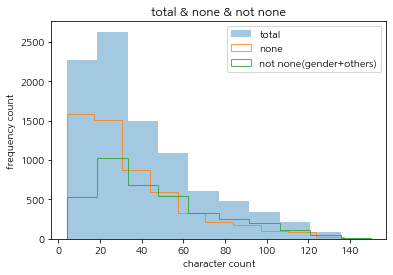

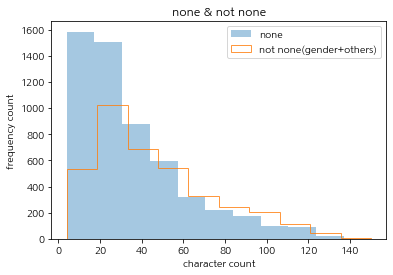

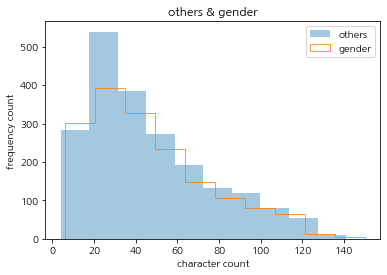

<Figure size 432x288 with 0 Axes>

In [160]:
# 증강시킨 데이터 분포 살피기

#bias의 각 값들 설정
df_others2 = train_df3[train_df3['bias'] == 'others']
df_others2.reset_index(drop=True, inplace=True)

df_gender2 = train_df3[train_df3['bias'] == 'gender']
df_gender2.reset_index(drop=True, inplace=True)

df_not_none2 = pd.concat([df_others2, df_gender2])
df_not_none2.reset_index(drop=True, inplace=True)

df_none3 = train_df3[train_df3['bias'] == 'none']
df_none3.reset_index(drop=True, inplace=True)

#전체와 none, not none 비교
plt.hist(train_df3['comment'].str.len(), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none3['comment'].str.len(), alpha=0.8, histtype='step', label='none')
plt.hist(df_not_none2['comment'].str.len(), alpha=0.8, histtype='step', label='not none(gender+others)')
plt.title('total & none & not none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#전체와  not none 비교
plt.hist(df_none3['comment'].str.len(), alpha=0.4, histtype='bar', label='none')
plt.hist(df_not_none2['comment'].str.len(), alpha=0.8, histtype='step', label='not none(gender+others)')
plt.title('none & not none')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#others와 gender 비교
plt.hist(df_others2['comment'].str.len(), alpha=0.4, histtype='bar', label='others')
plt.hist(df_gender2['comment'].str.len(), alpha=0.8, histtype='step', label='gender')
plt.title('others & gender')
plt.legend()
plt.xlabel('character count')
plt.ylabel('frequency count')
plt.figure()

#### 2.koreda

1. SR

특정 단어를 유의어로 교체하는 방식.

2. RI, RD

임의의 단어를 삽입(Insertion)하거나 삭제(Deletion)하는 방식

3. RS

문장 내 임의의 두 단어의 위치를 바꾸는 것.

In [ ]:
# import random
# import pickle
# import re

# wordnet = {}
# with open("/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/pickle/wordnet.pickle", "rb") as f:
# 	wordnet = pickle.load(f)


# # 한글만 남기고 나머지는 삭제
# def get_only_hangul(line):
# 	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',line)

# 	return parseText

# ########################################################################
# # Synonym replacement
# # Replace n words in the sentence with synonyms from wordnet
# ########################################################################
# def synonym_replacement(words, n):
# 	new_words = words.copy()
# 	random_word_list = list(set([word for word in words]))
# 	random.shuffle(random_word_list)
# 	num_replaced = 0
# 	for random_word in random_word_list:
# 		synonyms = get_synonyms(random_word)
# 		if len(synonyms) >= 1:
# 			synonym = random.choice(list(synonyms))
# 			new_words = [synonym if word == random_word else word for word in new_words]
# 			num_replaced += 1
# 		if num_replaced >= n:
# 			break

# 	if len(new_words) != 0:
# 		sentence = ' '.join(new_words)
# 		new_words = sentence.split(" ")

# 	else:
# 		new_words = ""

# 	return new_words


# def get_synonyms(word):
# 	synomyms = []

# 	try:
# 		for syn in wordnet[word]:
# 			for s in syn:
# 				synomyms.append(s)
# 	except:
# 		pass

# 	return synomyms

# ########################################################################
# # Random deletion
# # Randomly delete words from the sentence with probability p
# ########################################################################
# def random_deletion(words, p):
# 	if len(words) == 1:
# 		return words

# 	new_words = []
# 	for word in words:
# 		r = random.uniform(0, 1)
# 		if r > p:
# 			new_words.append(word)

# 	if len(new_words) == 0:
# 		rand_int = random.randint(0, len(words)-1)
# 		return [words[rand_int]]

# 	return new_words

# ########################################################################
# # Random swap
# # Randomly swap two words in the sentence n times
# ########################################################################
# def random_swap(words, n):
# 	new_words = words.copy()
# 	for _ in range(n):
# 		new_words = swap_word(new_words)

# 	return new_words

# def swap_word(new_words):
# 	random_idx_1 = random.randint(0, len(new_words)-1)
# 	random_idx_2 = random_idx_1
# 	counter = 0

# 	while random_idx_2 == random_idx_1:
# 		random_idx_2 = random.randint(0, len(new_words)-1)
# 		counter += 1
# 		if counter > 3:
# 			return new_words

# 	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
# 	return new_words

# ########################################################################
# # Random insertion
# # Randomly insert n words into the sentence
# ########################################################################
# def random_insertion(words, n):
# 	new_words = words.copy()
# 	for _ in range(n):
# 		add_word(new_words)
	
# 	return new_words


# def add_word(new_words):
# 	synonyms = []
# 	counter = 0
# 	while len(synonyms) < 1:
# 		if len(new_words) >= 1:
# 			random_word = new_words[random.randint(0, len(new_words)-1)]
# 			synonyms = get_synonyms(random_word)
# 			counter += 1
# 		else:
# 			random_word = ""

# 		if counter >= 10:
# 			return
		
# 	random_synonym = synonyms[0]
# 	random_idx = random.randint(0, len(new_words)-1)
# 	new_words.insert(random_idx, random_synonym)



# def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4):
# 	sentence = get_only_hangul(sentence)
# 	words = sentence.split(' ')
# 	words = [word for word in words if word is not ""]
# 	num_words = len(words)

# 	augmented_sentences = []
# 	num_new_per_technique = int(num_aug/4) + 1

# 	n_sr = max(1, int(alpha_sr*num_words))
# 	n_ri = max(1, int(alpha_ri*num_words))
# 	n_rs = max(1, int(alpha_rs*num_words))

# 	# sr
# 	for _ in range(num_new_per_technique):
# 		a_words = synonym_replacement(words, n_sr)
# 		augmented_sentences.append(' '.join(a_words))

# 	# ri
# 	for _ in range(num_new_per_technique):
# 		a_words = random_insertion(words, n_ri)
# 		augmented_sentences.append(' '.join(a_words))

# 	# rs
# 	for _ in range(num_new_per_technique):
# 		a_words = random_swap(words, n_rs)
# 		augmented_sentences.append(" ".join(a_words))

# 	# rd
# 	for _ in range(num_new_per_technique):
# 		a_words = random_deletion(words, p_rd)
# 		augmented_sentences.append(" ".join(a_words))

# 	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
# 	random.shuffle(augmented_sentences)

# 	if num_aug >= 1:
# 		augmented_sentences = augmented_sentences[:num_aug]
# 	else:
# 		keep_prob = num_aug / len(augmented_sentences)
# 		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

# 	augmented_sentences.append(sentence)

# 	return augmented_sentences

In [ ]:
# #확인
# print(EDA(train_df["comment"][0], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[0])
# print(EDA(train_df["comment"][0], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[1])
# print(EDA(train_df["comment"][0], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[2])
# print(EDA(train_df["comment"][0], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[3])
# print(EDA(train_df["comment"][0], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[4])

김태리 정말 연기잘해 짜
김태리 정말 연기잘해 진
김태리 정말 연기잘해 진 진짜
김태리 정말 연기잘해 진짜
김태리 정말 연기잘해 진짜


In [ ]:
# #comment 5배늘리기
# aug_comment = []

# for i in range(len(train_df)):
#   aug_comment.append(EDA(train_df["comment"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[0])
#   aug_comment.append(EDA(train_df["comment"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[1])
#   aug_comment.append(EDA(train_df["comment"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[2])
#   aug_comment.append(EDA(train_df["comment"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[3])
#   aug_comment.append(EDA(train_df["comment"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[4])

In [ ]:
# len(aug_comment)

41835

In [ ]:
# #label도 5배 늘리기
# aug_label = []

# for i in range(len(train_df)):
#   aug_label.append(train_df['label'][i])
#   aug_label.append(train_df['label'][i])
#   aug_label.append(train_df['label'][i])
#   aug_label.append(train_df['label'][i])
#   aug_label.append(train_df['label'][i])

In [ ]:
# len(aug_label)

41835

In [ ]:
# #title도 5배 늘리기

# aug_title = []

# for i in range(len(train_df)):
#   aug_title.append(EDA(train_df["title"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[0])
#   aug_title.append(EDA(train_df["title"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[1])
#   aug_title.append(EDA(train_df["title"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[2])
#   aug_title.append(EDA(train_df["title"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[3])
#   aug_title.append(EDA(train_df["title"][i], alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4)[4])

In [ ]:
# len(aug_title)

41835

In [ ]:
# #데이터를 증식한 새로운 데이터프레임 생성
# aug_train = pd.DataFrame({'title': aug_title, 'comment': aug_comment, 'label':aug_label})
# aug_train 

,title,comment,label
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,0
1,"""'미스터 션샤인' 변요한, 같은 김태리와 양복 입고 학당 방문! 이유는?""",김태리 연기잘해 진짜,0
2,"""'미스터 션샤인' 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 짜,0
3,"""'미스터 션샤인' 변요한, 학당 같은 양복 입고 김태리와 방문! 이유는?""",김태리 정말 진 연기잘해 진짜,0
4,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,0
...,...,...,...
41830,"진단, """"악성림프종 ""허지웅·소속사 치료 전념"""" (공식)""",쭉 쉬세요,1
41831,"""허지웅·소속사 """"악성림프종 진단, 치료 (공식)"" 전념""""",쭉 쉬세요,1
41832,"""허지웅·소속사 """"악성림프종 진단, 료 전념"""" (공식)""",쭉 쉬세요,1
41833,"""허지웅·소속사 전념"""" 진단, 치료 """"악성림프종 (공식)""",쉬세요 쭉,1


In [ ]:
# #데이터를 늘렸지만 comment만 중복은 제거
# aug_train2 = aug_train.drop_duplicates(subset = ['comment']).reset_index(drop=True) # comment 열에서 중복인 내용이 있다면 중복 제거
# aug_train2

,title,comment,label
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,0
1,"""'미스터 션샤인' 변요한, 같은 김태리와 양복 입고 학당 방문! 이유는?""",김태리 연기잘해 진짜,0
2,"""'미스터 션샤인' 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 짜,0
3,"""'미스터 션샤인' 변요한, 학당 같은 양복 입고 김태리와 방문! 이유는?""",김태리 정말 진 연기잘해 진짜,0
4,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,1
...,...,...,...
23889,"""[POP이슈]""""그들만의 새해데이트에 '반응싸늘'""",아름다운 참으로 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...,0
23890,[종합] '시크릿 김소연 죽였나…송윤아와 갈등,재미가 없어요,0
23891,갈 [종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등,없어요 재미가,0
23892,"진단, """"악성림프종 ""허지웅·소속사 치료 전념"""" (공식)""",쭉 쉬세요,1


## Model

In [9]:
!pip install -U transformers


     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 84.6 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 6.5 MB 53.1 MB/s 
     |████████████████████████████████| 895 kB 31.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [10]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

In [11]:
# seed 고정, gpu 고정
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(2022)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [12]:
from transformers import ElectraModel, ElectraTokenizer
from transformers import ElectraTokenizer

In [13]:
MODEL_NAME = 'beomi/KcELECTRA-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 6 

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

Downloading:   0%|          | 0.00/288 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/504 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475M [00:00<?, ?B/s]

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifi

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(50135, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [18]:
#Tokenizing
train_dataset, eval_dataset = train_test_split(train_df, test_size=0.2, shuffle=True, stratify=train_df['label'])

tokenized_train = tokenizer(
    list(train_dataset['title']),  
    list(train_dataset['comment']), # comment 만 학습에 사용하도록 title 제거
    return_tensors="pt",
    max_length=137, # Max_Length = 138  tokenizing 하면 길이가 줄어들어서 128로 해도 무관한듯 ?
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['title']),
    list(eval_dataset['comment']),
    return_tensors="pt",
    max_length=137,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    2,    61, 31588,  4515,  4081,    63, 10801,  4036, 35693, 39471,
         4192,    11,  2768,  4121,  4037,    11,    18,    18, 11643, 36028,
        12109,  4115,    12, 18398,    13,     3, 34290,  7985, 16457,    18,
        10801,  4036, 15123,  4012, 22997, 12398, 18640, 11061,  4023,  8453,
        21448,    18, 14099, 22775,  7973, 41184,  9715,  4070,  4558,    18,
        22411, 11061, 11574, 11337,    96,    96,     3,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0])
[CLS] [ SC현장 ] 조민기 찬물 끼얹은'작신아 '.. 논란 후폭풍 이길까 ( 종합 ) [SEP] 연기자들은 반성해라. 조민기 선생님이 현실에서도 다양한 연기를 보여줬다. 이번에는 성추행범으로 열연하신거뿐. 연말 연기대상 가즈아 ~ ~ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [19]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [20]:
# 원래는 문자열을 숫자로 바꿔서 label list에 담는건데 고장날까봐 그냥 사용함.
# 제대로 할거면 함수 지우고 label column 만 train_label 변수에 담으면 됨.
def label_to_num(label): 
    label_dict = {0 : 0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5}  
    num_label = []

    for v in label: 
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

In [21]:
train_label[:10]

[1, 3, 0, 0, 0, 0, 0, 0, 0, 5]

In [23]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(6692))
print(tokenizer.decode(train_dataset.__getitem__(6692)['input_ids'])) # 메서드 호출하면 이렇게 생겼구나 ..

6693
{'input_ids': tensor([    2,     6, 32410,  4140,    16,     6,     6,   595,  8042, 34932,
        11679,    18,    18,    18,  8571,  1990,  9052, 37112, 24359,  8040,
         1636, 21806,  9577,  1738,     6,     6,     6,     3,  2456,  4075,
        19353,  8007,    33,    33,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [24]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.
  f1 = f1_score(labels, preds, average='macro')

  return {
      'accuracy': acc,
      'f1-score' : f1
  }

In [25]:
training_ars = TrainingArguments(

    # 항상바꿔주자. checkpoint 마다 모델이 해당 경로에 저장됨.
    output_dir='/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/', 
    num_train_epochs=10,
    per_device_train_batch_size=32,
    save_total_limit=5, # 성능 상위 5개 모델만 저장.  이거 용량 꽤 커서 제한 해줘야댐.
    save_steps=500,
    evaluation_strategy='steps',
    eval_steps =500,
    load_best_model_at_end = True,  # parameter들 의미를 정확히 모름 알아보고 바꿔주면 성능 올라갈듯.
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [26]:
trainer.train()
model.save_pretrained('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/kctest_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6693
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2100


Step,Training Loss,Validation Loss,Accuracy,F1-score
500,0.879400,1.019168,0.654122,0.433704
1000,0.320700,1.432199,0.653524,0.484503
1500,0.111600,1.859905,0.655914,0.507800
2000,0.039700,2.054162,0.654122,0.503160


***** Running Evaluation *****
  Num examples = 1674
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-500
Configuration saved in /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1674
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-1000
Configuration saved in /content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-1000/config.json
Model weights

# prediction 을 위해 저장된 모델 load

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = 'beomi/KcELECTRA-base'
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = '/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/result2/checkpoint-1500'  # checkpoint 마다 미리 지정해둔 경로에 모델 저장됨
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading configuration file https://huggingface.co/beomi/KcELECTRA-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/61dd2bdbb7e56ff51fdc66b6f0d1973d2d806cd616d38a149f1bfd2753babc3c.ba488f0d9624511a98ed83af3e8f6b33fe20b502e2cfb16ee9858a6b6f521982
Model config ElectraConfig {
  "_name_or_path": "beomi/KcELECTRA-base",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "tokenizer_class": "BertTokenizer",
  "tra

PreTrainedTokenizerFast(name_or_path='beomi/KcELECTRA-base', vocab_size=50135, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [28]:
# test data에 label column을 추가해주자. test.csv 는 위에서 train 이랑 같이 불러왔음.
test_df['label'] = 0
test_df.head(5)

,ID,title,comment,label
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요,0
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?,0
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ...",0
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...,0


In [29]:
test_label = label_to_num(test_df['label'].values)

tokenized_test = tokenizer(
    list(test_df['title']),
    list(test_df['comment']),
    return_tensors="pt",
    max_length=137,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(510))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

511
{'input_ids': tensor([    2,  2571,  4473,  4424, 27048,    11, 42252,  4192,    16, 31895,
        12869,    33,    18,    18,    18,  2155,  4529,  4041, 29372, 12634,
           11, 31971,    11,     3, 11010,  2111,  4050,  5222,  4012,  8229,
         4010,  8842, 23704,     3,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask'

In [30]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 32/32 [00:01<00:00, 21.93it/s]

[0, 0, 1, 1, 1, 1, 1, 3, 5, 0, 3, 5, 0, 3, 0, 5, 3, 5, 0, 0, 5, 1, 3, 1, 0, 0, 5, 0, 1, 0, 3, 5, 1, 3, 0, 5, 1, 0, 1, 2, 5, 3, 3, 0, 0, 3, 3, 1, 0, 5, 2, 0, 3, 5, 0, 5, 5, 0, 0, 3, 3, 4, 0, 5, 1, 1, 1, 3, 0, 5, 0, 1, 1, 1, 5, 0, 5, 2, 1, 5, 3, 1, 3, 0, 1, 0, 1, 3, 5, 0, 0, 1, 1, 1, 1, 5, 1, 3, 0, 1, 0, 1, 3, 0, 5, 1, 0, 1, 1, 0, 0, 5, 5, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 5, 1, 5, 5, 0, 0, 0, 1, 0, 5, 1, 0, 3, 0, 0, 1, 0, 1, 5, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 5, 5, 0, 3, 3, 0, 0, 0, 5, 0, 1, 3, 5, 0, 3, 5, 0, 5, 0, 0, 0, 5, 3, 5, 1, 5, 0, 0, 3, 5, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 1, 1, 2, 4, 1, 1, 0, 4, 1, 5, 1, 5, 2, 0, 1, 1, 3, 0, 3, 0, 1, 0, 5, 5, 1, 3, 1, 1, 3, 4, 1, 1, 0, 3, 0, 3, 3, 5, 0, 0, 1, 5, 5, 0, 1, 0, 5, 3, 3, 5, 0, 0, 5, 1, 3, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 5, 5, 1, 0, 3, 0, 0, 0, 5, 5, 1, 0, 3, 5, 1, 0, 1, 0, 3, 1, 0, 3, 2, 4, 5, 0, 0, 0, 1, 5, 0, 1, 1, 1, 3, 0, 3, 1, 5, 1, 0, 0, 5, 4, 1, 0, 1, 2, 0, 1, 0, 1, 0, 3, 5, 5, 5, 1, 0, 5, 3, 1, 0, 1, 1, 3, 0, 3, 1, 0, 5, 1, 5, 0, 1, 

In [31]:
# 0-5 사이의 라벨 값 별로 bias, hate로 디코딩 하기 위한 딕셔너리
bias_dict = {0: 'none', 1: 'none', 2: 'others', 3:'others', 4:'gender', 5:'gender'}
hate_dict = {0: 'none', 1: 'hate', 2: 'none', 3:'hate', 4:'none', 5:'hate'}

# 인코딩 값으로 나온 타겟 변수를 디코딩
pred_bias = ['' for i in range(len(pred_answer))]
pred_hate = ['' for i in range(len(pred_answer))]

for idx, label in enumerate(pred_answer):
    pred_bias[idx]=(str(bias_dict[label]))
    pred_hate[idx]=(str(hate_dict[label]))
print('decode Completed!')

decode Completed!


In [32]:
print(pred_bias)
print(pred_hate)

['none', 'none', 'none', 'none', 'none', 'none', 'none', 'others', 'gender', 'none', 'others', 'gender', 'none', 'others', 'none', 'gender', 'others', 'gender', 'none', 'none', 'gender', 'none', 'others', 'none', 'none', 'none', 'gender', 'none', 'none', 'none', 'others', 'gender', 'none', 'others', 'none', 'gender', 'none', 'none', 'none', 'others', 'gender', 'others', 'others', 'none', 'none', 'others', 'others', 'none', 'none', 'gender', 'others', 'none', 'others', 'gender', 'none', 'gender', 'gender', 'none', 'none', 'others', 'others', 'gender', 'none', 'gender', 'none', 'none', 'none', 'others', 'none', 'gender', 'none', 'none', 'none', 'none', 'gender', 'none', 'gender', 'others', 'none', 'gender', 'others', 'none', 'others', 'none', 'none', 'none', 'none', 'others', 'gender', 'none', 'none', 'none', 'none', 'none', 'none', 'gender', 'none', 'others', 'none', 'none', 'none', 'none', 'others', 'none', 'gender', 'none', 'none', 'none', 'none', 'none', 'none', 'gender', 'gender', '

In [33]:
# submission 파일 가져오기
submit = pd.read_csv('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data/sample_submission.csv') 

# submission 에 prediction 값 넣기
submit['bias'] = pred_bias
submit['hate'] = pred_hate
submit.head(20)

,ID,bias,hate
0,0,none,none
1,1,none,none
2,2,none,hate
3,3,none,hate
4,4,none,hate
5,5,none,hate
6,6,none,hate
7,7,others,hate
8,8,gender,hate
9,9,none,none


In [37]:
# 항상 바꿔주자. submit 저장경로.
submit.to_csv('/content/drive/MyDrive/모의경진대회/비매너_댓글_식별/data2/kcelec_submission5.csv', index=False)

In [35]:
test_df.head(20)

,ID,title,comment,label
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요,0
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?,0
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ...",0
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...,0
5,5,"[팝인터뷰①]이세영 ""'화유기', 참 아픈 작품…더 나은 환경 기대해""","그건 불가능해. 그냥 은퇴해서 평범하게 살아라. 언제가 될지는 모르지만, 시기가 문...",0
6,6,[SS리뷰] '골목식당' 신흥시장 변화 이끈 백종원의 '진심',골목살리고 지가하는 체인점 다입점해서. 때돈벌고. 피디 술사주고. 지가 음식점 체인...,0
7,7,"[★NEWsing] 현아·이던 열애 그후, 팬 위한 배려는 어디로?",근데 팬들이 나서야되는데 왜 일반인들이 연애할수도 있지 이 ㅈㄹ임 ㅋㅋㅋㅋ 내가 봐...,0
8,8,"장동윤, 운명적 배우 데뷔→인생작 '녹두전' 만나기까지(종합)",여자같다 어깨도 너무좁고 뜨긴글럿네,0
9,9,"[SC현장]""연예인 인생 협박 유감""…미소잃은 최민수, '보복운전 혐의' 2차 공판...",좋게좋게 해결되시길,0


In [36]:
print(tokenizer.decode(test_dataset.__getitem__(15)['input_ids']))

[CLS] " 제리케이, 넌 맞아야겠다 " … 산이,'페미니스트'이어'6. 9cm'또 신곡 발표 [ 전문 ] [SEP] 여기 성별에 댓글만봐도 한남 믿거할수있겠다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
